In [1]:
# Dependencies
import cv2
import numpy as np
import pandas as pd

import os
import glob
import pickle
import random
from tqdm import tqdm

import pydicom
from pydicom.data import get_testdata_files

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
# Utils

def sort_DcmFiles(dcm_paths):
    
    sorted_dcm_paths = ['' for i in range(len(dcm_paths))]
    
    try:
        for n, path in enumerate(dcm_paths):
            dataset = pydicom.dcmread(path)
            sorted_dcm_paths[int(dataset.InstanceNumber) - 1] = path

        return sorted_dcm_paths

    except:
        return dcm_paths

def image_3D(sorted_paths, rows, cols):
    
    #image_array = np.zeros((len(sorted_paths), rows, cols))

            
    image_list = []

    for n, path in enumerate(sorted_paths):
        print(path)
        dataset = pydicom.dcmread(path)                  # Read dcm file
        image = dataset.pixel_array                      # Get image from dcm file
#         if image is None:
#             print(path, n)
#             continue
        image_list.append(cv2.resize(image, (224, 224)))  # pre-process the image
           
    return np.array(image_list)


def get_PatientInfo(dcm_FilePath, num_paths, exam, df):
    
    dataset = pydicom.dcmread(dcm_FilePath)
    print("Instance number / Total instance .. {}/{}".format(str(dataset.InstanceNumber), num_paths))
    print("EDSS score ... {}".format(df[df['Sequence_id'] == int(random_exam)]['EDSS'].values[0]))
    print("Patient id.......:", dataset.PatientID)
    print("Patient Sex.......:", dataset.PatientSex)
    print("Patient Weight.......:", dataset.PatientWeight)
    print("Acquisition Date.......:", dataset.AcquisitionDate)
    print("Pregnancy Status.......:", dataset.PregnancyStatus)
    print("Patient BirthDate.......:", dataset.PatientBirthDate)
    print("Image shape.......:", dataset.pixel_array.shape)
    print("Modality.........:", dataset.Modality)
    print("Study Date.......:", dataset.StudyDate)
    print("")
    plt.imshow(dataset.pixel_array, cmap='gray')
    plt.show()
    
    return dataset.pixel_array.shape
    
def plot_3DImage(image_array, cols=5):
    
    rows = image_array.shape[0] // cols + 1
    fig = plt.figure(figsize=(30, 5*rows))
    
    for n, image in enumerate(image_array):
        print(n)
        ax = fig.add_subplot(rows, cols, n+1)
        ax.imshow(image, cmap='gray')
        plt.subplots_adjust(wspace=0.35, hspace=0.35)
        plt.title("slice_" + str(n))
        
def read_xls(file_path):
    
    return pd.read_excel(file_path, sheet_name='Feuil1')
     

In [119]:
base_path = '/home/alex/Dataset 1/'
exams = [i.split('/')[-1] for i in glob.glob(base_path + '*')]
random_exam = "26108" #random.choice(exams)
dcm_paths = glob.glob(base_path + random_exam + '/*.dcm')
sorted_paths = sort_DcmFiles(dcm_paths)

file_path = '/home/alex/Dataset 1/Dataset - 1.xlsx'
df = read_xls(file_path)

Instance number / Total instance .. 6/22
EDSS score ... 2.0
Patient id.......: 0150010
Patient Sex.......: M
Patient Weight.......: 70
Acquisition Date.......: 20150319
Pregnancy Status.......: 0
Patient BirthDate.......: 19790101
Image shape.......: (256, 256)
Modality.........: MR
Study Date.......: 20150319



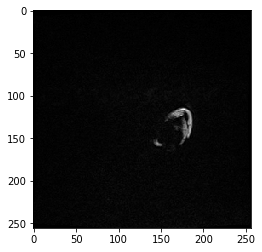

In [120]:
# Get patient information 
rows, cols, = get_PatientInfo(dcm_paths[0], len(dcm_paths), random_exam, df)

/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.2015031912480819860069286.dcm
/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.201503191248081493769242.dcm
/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.2015031912480828853369311.dcm
/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.2015031912480857366769368.dcm
/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.2015031912480851080269347.dcm
/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.2015031912480861371369372.dcm
/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.2015031912480843470369340.dcm
/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.201503191248082770569245.dcm
/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.2015031912480857080769366.dcm
/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.2015031912480855205769356.dcm
/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.2015031912480832707069318.dcm
/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.201503191248085519686935

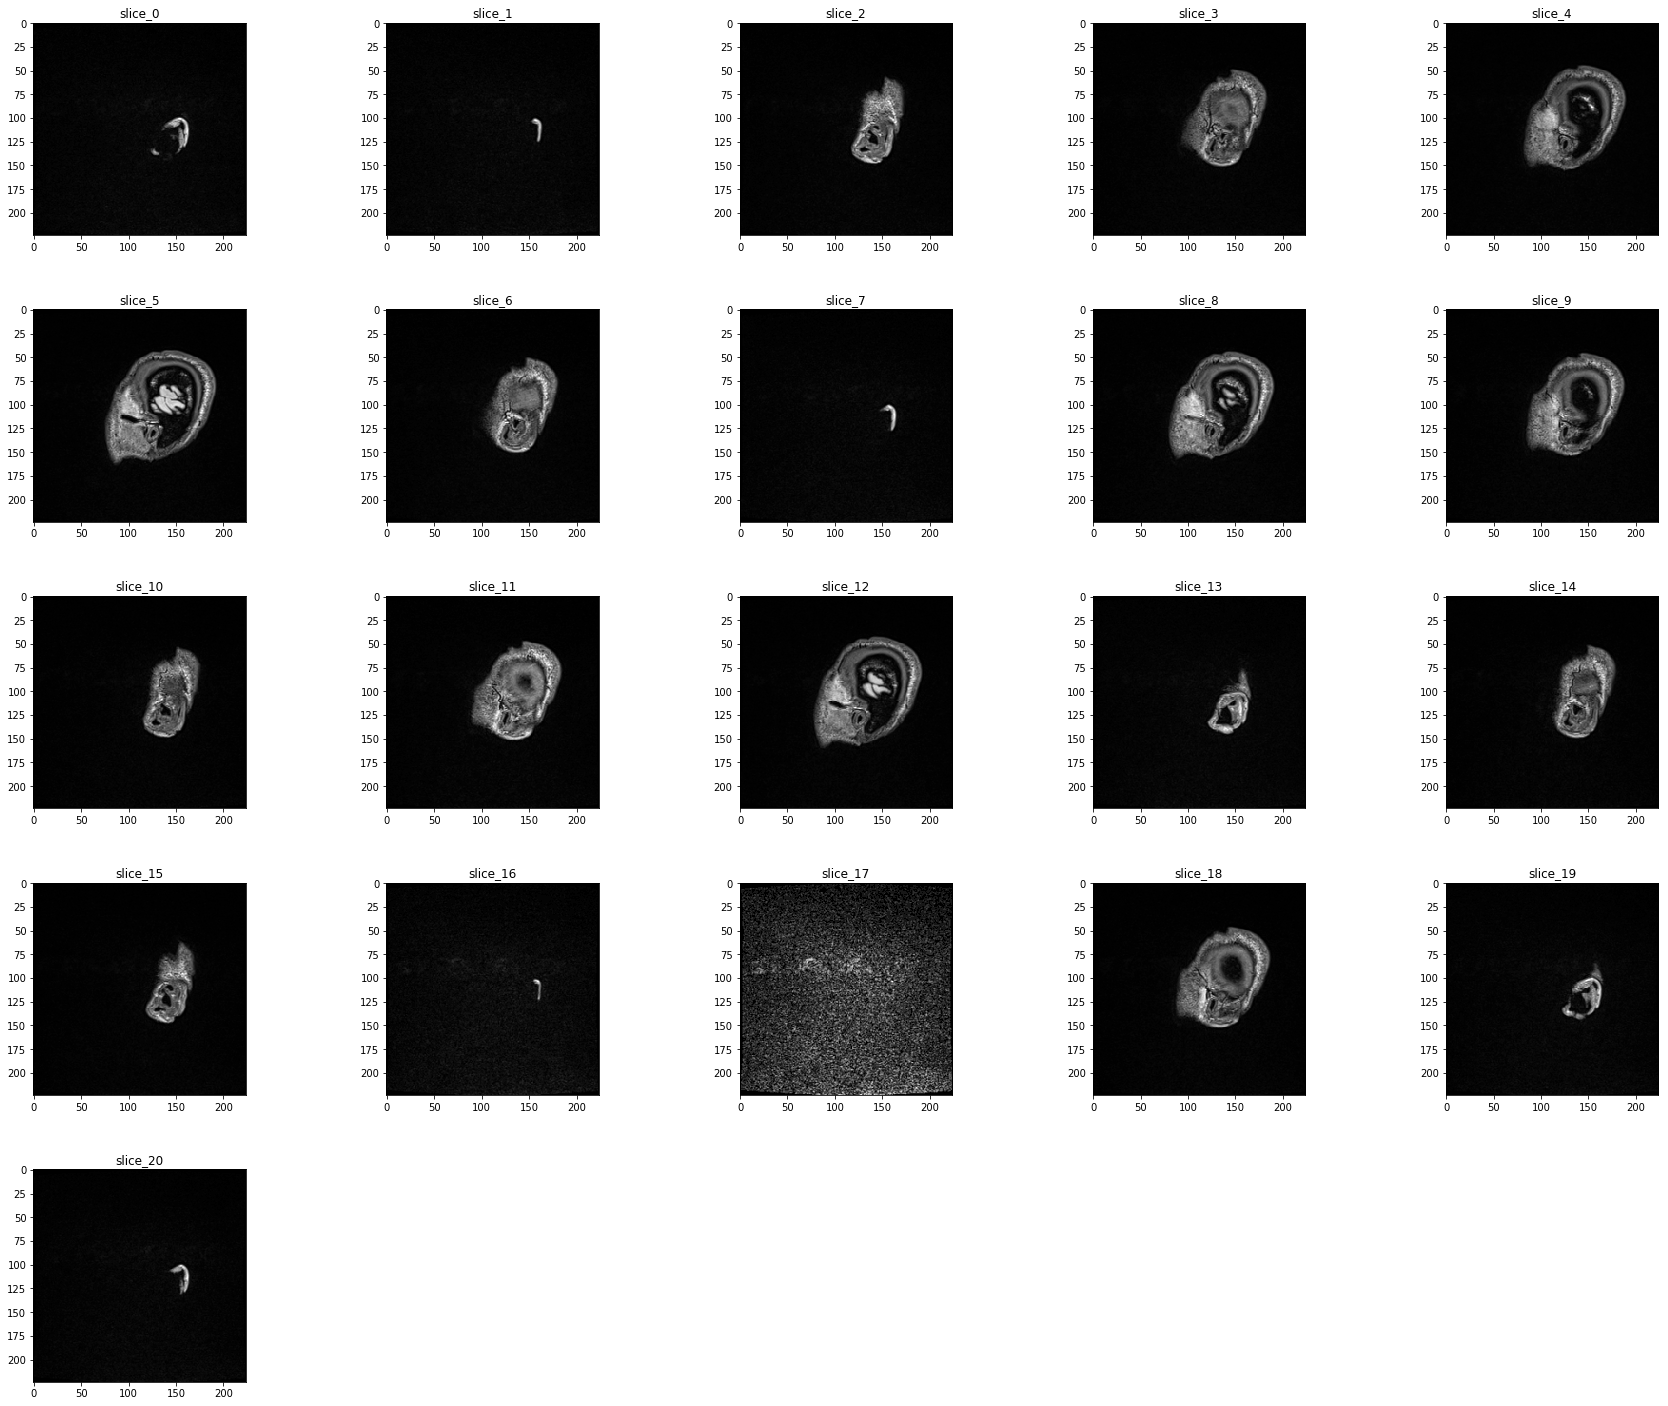

In [123]:
# Plot patient MRI images
dcm_paths.pop(dcm_paths.index('/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.2015031912480869998469389.dcm'))
image_array = image_3D(dcm_paths, rows, cols)
plot_3DImage(image_array)

In [90]:
image_array[30]

''

# Data Exploration

In [4]:
file_path = '/home/alex/Dataset 1/Dataset - 1.xlsx'

In [6]:
df = read_xls(file_path)
df.head()

,Sequence_id,age,sexe,EDSS,examination_date
0,7428,34,F,1.5,2015-10-23
1,7489,45,M,1.0,2014-05-13
2,7509,48,F,6.0,2014-01-14
3,7525,42,F,2.5,2014-05-19
4,7552,34,M,1.5,2016-02-04


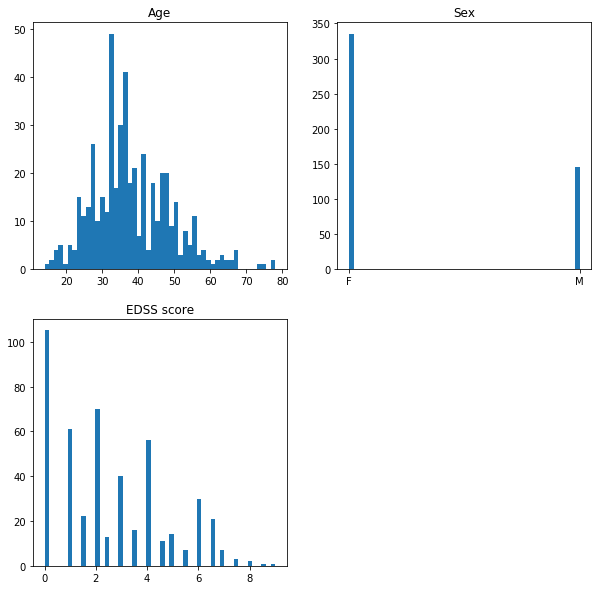

In [73]:
## Stats concerning the xls file 
fig = plt.figure(figsize=(10,10))

rows = 2
cols = 2

ax = fig.add_subplot(rows, cols, 1)
ax.hist(df['age'].tolist(), bins=50)
plt.title("Age")

ax = fig.add_subplot(rows, cols, 2)
ax.hist(df['sexe'].tolist(), bins=50)
plt.title("Sex")

ax = fig.add_subplot(rows, cols, 3)
ax.hist(df['EDSS'].tolist(), bins=50)
plt.title("EDSS score")

plt.show()

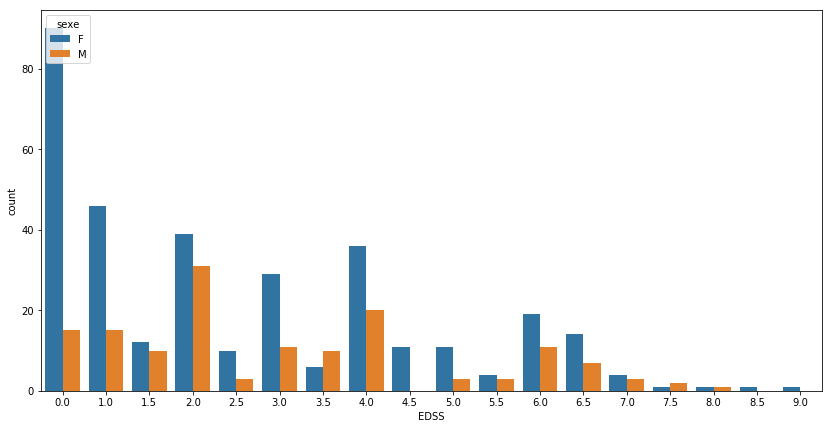

In [64]:
plt.figure(figsize=(14,7))

sns.countplot(x='EDSS',data=df, hue='sexe')

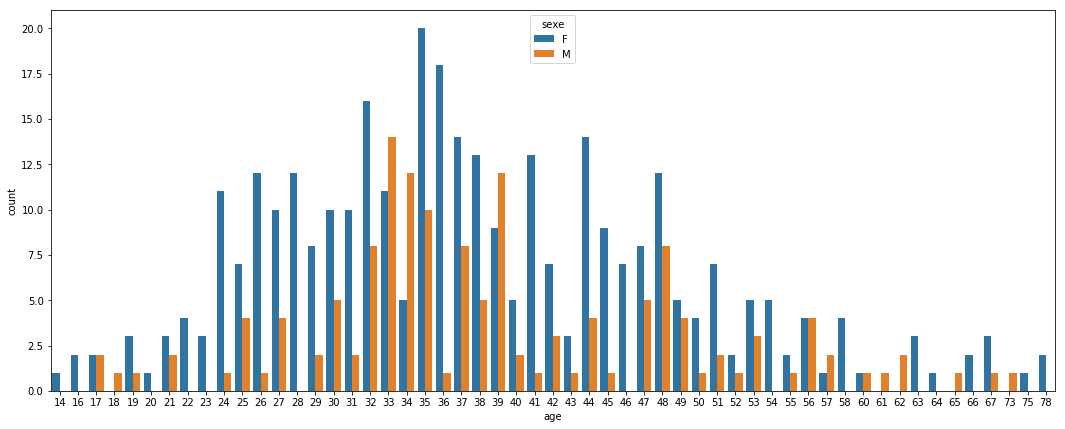

In [66]:
plt.figure(figsize=(18,7))
sns.countplot(x='age',data=df, hue='sexe')

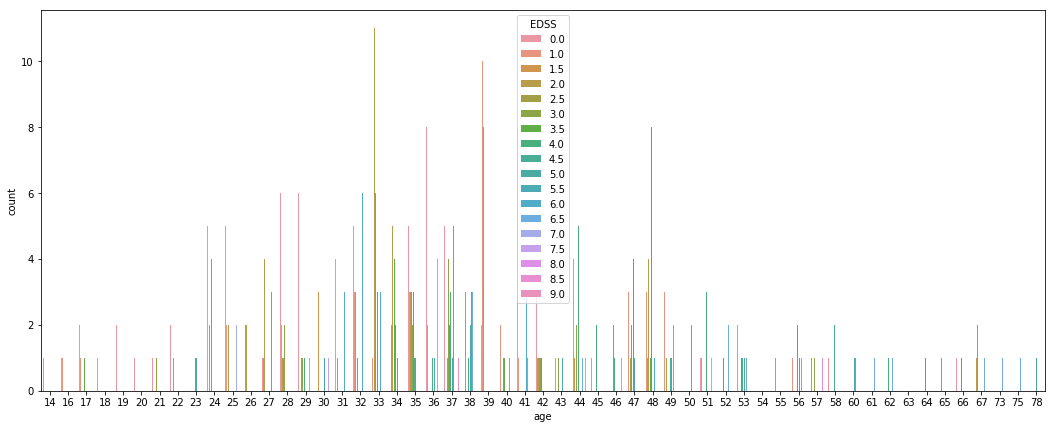

In [67]:
plt.figure(figsize=(18,7))
sns.countplot(x='age',data=df, hue='EDSS')

# Pre-processing

In [ ]:
"""
I'm going ahead with some classic pre-processing strategies namely,
- getting path and arranging images in a 3D format
- min-max normalizations
- resahping the image
- keras data augm
"""

In [124]:
class ImagePreprocess(object):
    """
    Class for preparing images
    """
    def __init__(self, resize, channels, norm_type):
        
        self.resize = resize
        self.channels = channels
        self.norm_type = norm_type
     
    def __rescale(self, image):
        """
        Resize and rescale the image
        """
        
        image = cv2.resize(image, (self.resize, self.resize))
        return image.reshape((self.resize, self.resize, self.channels))
        
    def __normalize(self, image):
        """
        Channel-wise normalization
        """
        
        if self.norm_type == 'min-max':
            return np.float32((image - np.min(image))/(0.00001+(np.max(image) - np.min(image))))
        
        elif self.norm_type == 'mean-var':
            return np.float32((image - np.mean(image))/((np.std(image)+0.00001)))
        
        else:
            raise ValueError("Un-identified parameter value, ntype : {}".format(ntype))
    
    def preproc_image(self, image):
        """
        Pre-process the image
        """
        normalized_img = self.__normalize(image)
        rescaled_img = self.__rescale(normalized_img)
            
        return rescaled_img 
        

In [125]:
class GetData(ImagePreprocess):
    """
    Class for putting together the training data 
    """
    
    def __init__(self, exam_paths, df_path, **kwargs):
        
        self.exam_paths = exam_paths 
        self.df_path = df_path
        
        super().__init__(**kwargs)
        
        
    def __get_DCMPaths(self, exam_path):
        """
        Get all examination paths
        """
        return glob.glob(exam_path + '/*')
        
        
    def __get_ExamLabel(self, exam_number):
        """
        Get EDSS exam label
        """
        df = read_xls(self.df_path)
        return df[df['Sequence_id'] == exam_number]['EDSS'].values[0]
        
    
    def __get_3DImage(self, exam_DCMPaths):
        """
        Open dcm files, read image, preprocess them
        """
#         try:
#             image_list = ['' for i in range(len(exam_DCMPaths))]   

#             for path in exam_DCMPaths:
#                 dataset = pydicom.dcmread(path)                  # Read dcm file
#                 img_idx = int(dataset.InstanceNumber) - 1        # Get dcm instance number 
#                 image = dataset.pixel_array                      # Get image from dcm file
#                 if not image:
#                     continue
#                 image_list[img_idx] = self.preproc_image(image)  # pre-process the image
                
#         except Exception as ex:
#             print(ex, path.split('/')[-2])
        
        no_good = ['/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.2015031912480869998469389.dcm']
        image_list = []

        for path in exam_DCMPaths:
            if path in no_good:
                continue
            dataset = pydicom.dcmread(path)                  # Read dcm file
            image = dataset.pixel_array                      # Get image from dcm file
            image_list.append(self.preproc_image(image))  # pre-process the image
           
        # Get exam EDSS label
        exam_number = int(path.split('/')[-2])
        label = self.__get_ExamLabel(exam_number)

        return np.array(image_list), label
        
        
    def create_dataset(self):
        """
        Constructs the dataset
        """
        
        data_MRIImages = []
        data_MRILables = []
        
        for exam_path in tqdm(self.exam_paths):

            exam_DCMPaths = self.__get_DCMPaths(exam_path)
            mri_3DImage, label = self.__get_3DImage(exam_DCMPaths)

            data_MRIImages.append(mri_3DImage)
            data_MRILables.append(label)
            
        return data_MRIImages, data_MRILables


In [126]:
remove = ['Dataset - 1.xlsx']
exam_paths = glob.glob(base_path + '/*')
exam_paths = [i for i in exam_paths if i.split('/')[-1] not in remove]
resize = 299
channels = 1
norm_type = 'min-max'

df_path = base_path + 'Dataset - 1.xlsx'

g = GetData(exam_paths, df_path, resize=resize, channels=channels, norm_type=norm_type)

In [127]:
data_MRIImages, data_MRILabels  = g.create_dataset()

100%|██████████| 480/480 [05:55<00:00,  1.41it/s]


In [ ]:
with open('../data/data_MRIImages.pkl', 'wb') as f:
    pickle.dump(data_MRIImages, f)
with open('../data/data_MRILabels.pkl', 'wb') as f:
    pickle.dump(data_MRILabels, f)

# with open('parrot.pkl', 'rb') as f:
#     mynewlist = pickle.load(f)

In [ ]:
data_MRILabels

In [132]:
data_MRIImages[40].shape

(271, 299, 299, 1)

In [19]:
image_array = ['' for i in range(len(dcm_paths))]
        
try:
    for path in dcm_paths:
        dataset = pydicom.dcmread(path)
        img_idx = int(dataset.InstanceNumber) - 1
        image = dataset.pixel_array
        image_array[img_idx] = imp.preproc_image(image)

except Exception as ex:
    print(ex)
    #print(exam_path)



In [25]:
path.split('/')[-2]

'23826'

# Trainings

## Basic Training 1

In [ ]:
"""
Based on an implementation from kaggle. 
    - One Input layer with dimentions None, size, size, 1
    - Output layer with dimentions (could be either 20 or 1 (classi/reg))
    - Apply 4 Convolutional layer with increasing order of filter size 
    (standard size : 8, 16, 32, 64) and fixed kernel size = (3, 3, 3)
    - Apply 2 Max Pooling layers, one after 2nd convolutional layer and 
    one after fourth convolutional layer.
    - Batch normalization on convolutiona architecture
    - Dense layers with 2 layers followed by dropout to avoid overfitting
"""

In [ ]:
input_layer = Input((None, 16, 16, 3))

## convolutional layers
conv_layer1 = Conv3D(filters=8, kernel_size=(3, 3, 3), activation='relu')(input_layer)
conv_layer2 = Conv3D(filters=16, kernel_size=(3, 3, 3), activation='relu')(conv_layer1)

## add max pooling to obtain the most imformatic features
pooling_layer1 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer2)

conv_layer3 = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu')(pooling_layer1)
conv_layer4 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu')(conv_layer3)
pooling_layer2 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer4)

## perform batch normalization on the convolution outputs before feeding it to MLP architecture
pooling_layer2 = BatchNormalization()(pooling_layer2)
flatten_layer = Flatten()(pooling_layer2)

## create an MLP architecture with dense layers : 4096 -> 512 -> 10
## add dropouts to avoid overfitting / perform regularization
dense_layer1 = Dense(units=2048, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.4)(dense_layer1)
dense_layer2 = Dense(units=512, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.4)(dense_layer2)
output_layer = Dense(units=10, activation='softmax')(dense_layer2)

## define the model with input layer and output layer
model = Model(inputs=input_layer, outputs=output_layer)


In [ ]:
class CustomModels(object):
    
    def __init(self, model_type='basic_1'):
        
        self.model_type = 

# References

https://www.kaggle.com/shivamb/3d-convolutions-understanding-use-case


# Issues 

- Exams in dataset have missing dcm files (eg: .dcm file states that exam contians 35 slices, but only 22 were to be found)
- Few dcm files have corrupt images, hence can't be opened
- Some dcm files within an exam have similar instance numbers but different images
- Some exams have images taken from differnet angles (could explain the reason as to why images have 
- No point sorting images, as a good percentage of the exams don't have missing or mixed elements 

# Questions

In [59]:
"""
- What is Slice Thickness
- What is spacing between slices
- What's the deal with Acquisition Contrast and 
- Difference between (3D Flair et axial T2 Flair)
- Est-ce que c'est normal de faire la suivi d'un patient avec
des image ayant des modalités differnet ?
"""

''

In [77]:
lr_drop = 0.5
lr_drop_epochs = [10,20,30,40,50,60]

def step_decay(epoch):
    
    for n, _ in enumerate(lr_drop_epochs):
        
        if epoch <= lr_drop_epochs[0]:
            return 1e-4 
        
        elif epoch > lr_drop_epochs[n] and epoch <= lr_drop_epochs[n+1]:
            return 1e-4 * lr_drop**(n+1)
        
        elif epoch > lr_drop_epochs[-1]:
            return 1e-4 * lr_drop**(len(lr_drop_epochs))
        
        else:
            continue

In [7]:
import keras    
import tensorflow as tf 
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, BatchNormalization, LocallyConnected2D


In [28]:
adam = keras.optimizers.Adam(lr=0.0001)

In [15]:
inputs = Input(shape=(30, 30, 3))
x = BatchNormalization(axis=3, name='bn1')(inputs)
x = LocallyConnected2D(1, (3,3), padding='valid', activation='relu', name='conv1')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='pool1')(x)
x = keras.layers.Flatten(name='flatten')(x)
x = keras.layers.Dense(10, activation='relu', name='fc1')(x)
x = keras.layers.Dense(2, activation='sigmoid', name='predictions')(x)
m = Model(inputs, x, name='vgg_full')

In [16]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 30, 30, 3)         0         
_________________________________________________________________
bn1 (BatchNormalization)     (None, 30, 30, 3)         12        
_________________________________________________________________
conv1 (LocallyConnected2D)   (None, 28, 28, 1)         21952     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 196)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 10)                1970      
_________________________________________________________________
predictions (Dense)          (None, 2)                 22        
Total para

In [ ]:
Total params: 82,860
Trainable params: 82,854
Non-trainable params: 6